In [1]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=aa9e031370075dcf7696b009b39413acf76711f9f607097e2536167d5177495c
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from PIL import Image
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### (1)

ring.csv は、make_circles() で作ったデータ

2つのパラメータ x1, x2 のデータとラベル( 0 または 1 )のデータが入っている。

このデータをラベルを使わずに、k-means で２クラスタでクラスタリングし、

ラベルと比較して正解率を求める



正解率: 0.57


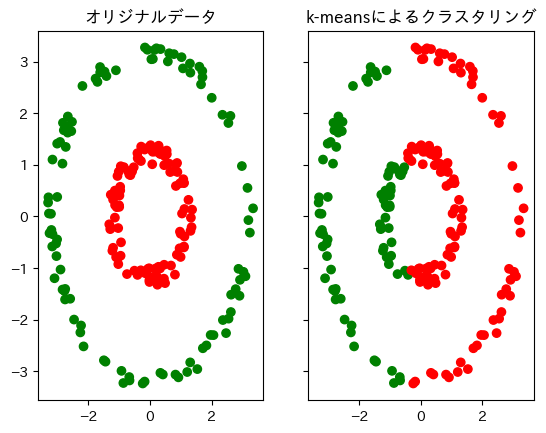

In [4]:
# --------------------(1)----------------------

# データの読み込み
df_all = pd.read_csv('ring.csv')
# X1とX2のみ
df_X = df_all[['x1', 'x2']]
# ラベルのみ、NumPy配列として取得
df_L = df_all['label'].to_numpy()
# ラベルを整数型に変換
df_L_int = df_L.astype(int)

# KMeansで2つのクラスタでインスタンス生成
model = KMeans(n_clusters=2, random_state=0, n_init='auto')
# X1とX2をフィット
model.fit(df_X)

# プロットして比較
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
ax = ax.ravel()
p_color = np.array(["red", "green", "orange", "blue", "yellow", "black"])

# オリジナルデータ
ax[0].scatter(df_X['x1'], df_X['x2'], c=p_color[df_L_int])
ax[0].set_title("オリジナルデータ")

# k-meansクラスタリング結果
ax[1].scatter(df_X['x1'], df_X['x2'], c=p_color[model.labels_])
ax[1].set_title("k-meansによるクラスタリング")
# 正解率
accuracy = accuracy_score(df_L_int, model.labels_)
print(f"\n\n正解率: {accuracy}")


### (2)

ring2.csv は、3 つのパラメータ x1,  x2,  x3 のデータとラベル( 0 または 1 )のデータが入っている。

このデータを、縦軸に x1,  横軸に x2,  高さ軸に x3 をとってラベルで色分けし、3 次元の散布図にする。

また、 このデータをラベルを使わずに、k-means で２クラスタでクラスタリングし、ラベルと比較して正解率を求める。

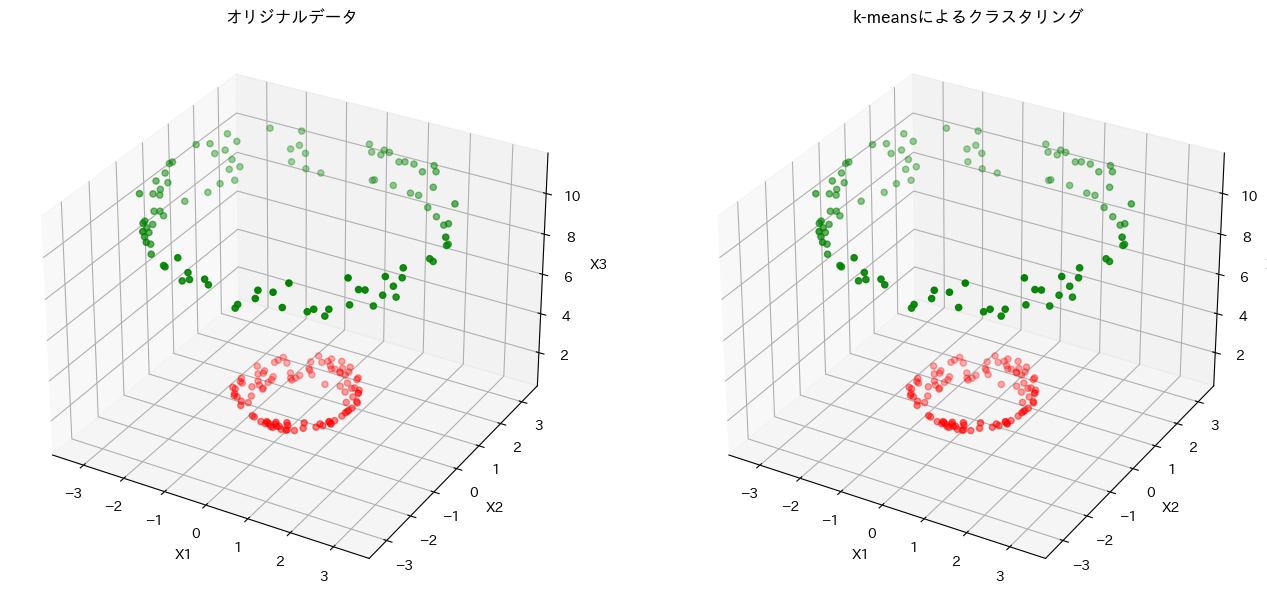



正解率: 1.0


In [6]:
# --------------------(2)----------------------

# データの読み込み
df2_all = pd.read_csv('ring2.csv')
# X1とX2とX3のみ
df2_X = df2_all[['x1', 'x2', 'x3']]
# ラベルのみ、NumPy配列として取得
df2_L = df2_all['label'].to_numpy()
# ラベルを整数型に変換
df2_L_int = df2_L.astype(int)

# KMeansで2つのクラスタでインスタンス生成
model2 = KMeans(n_clusters=2, random_state=0, n_init='auto')
# X1とX2とX3をフィット
model2.fit(df2_X)

# カラーパレット
p_color = np.array(["red", "green", "orange", "blue", "yellow", "black"])
# プロットして比較
fig = plt.figure(figsize=(16, 8))

# オリジナルデータ
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df2_X['x1'], df2_X['x2'], df2_X['x3'], c=p_color[df2_L_int])
# ラベルとタイトル
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')
ax1.set_title("オリジナルデータ")

# k-meansクラスタリング
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df2_X['x1'], df2_X['x2'], df2_X['x3'], c=p_color[model2.labels_])
# ラベルとタイトル
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')
ax2.set_title("k-meansによるクラスタリング")

plt.show()
# 正解率
accuracy2 = accuracy_score(df2_L_int, model2.labels_)
print(f"\n\n正解率: {accuracy2}")

### (3)


### 気づいたこと

make_circles()は分類らしく明確な分かれ方をしている。

k-meansはクラスタの中心を探す特性があると授業でイメージを話していた通り、

中心点通しが交わることがないからか、

円を半分に切るような対称的なクラスタリングをした。

~~ring2.csvについては、k-meansとの相性が悪かったことがring.csvよりも顕著に見える。~~

修正後: ring2.csvの方がring.csvよりもk-meansとの相性が良かった。

### 気づいたことから気づいたこと

1つのクラスタリングアルゴリズムが世の中の全てのデータセットに対して

最良の結果を提供するわけではないことが目に見えてわかります。

クラスタリングは、データの内在する構造やパターンを発見することが目的なのかなと気づきました。

どれが正解かとかはなく、クラスタリングの目的とそれに沿った

クラスタリングアルゴリズムの特性の理解と選択、評価の方法、

を事前に決める必要があると気づきました。
